<a href="https://colab.research.google.com/github/luciaemiliaeu/Nootebooks-Alura/blob/main/Previs%C3%A3o_de_dados_temporais_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
import numpy as np

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 15

#Base de dados Passageiros
Série temporal do número de passageiros de um vôo por dia.

*tempo*: float. O tempo está em valor numérico (ano.meses). Cada 0,08333 é um mês (1/12 = 0,0833). 

*passageiro*: inteiro. Número de passageiros.

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv"
s = requests.get(url).content
dataset = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
dataset

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


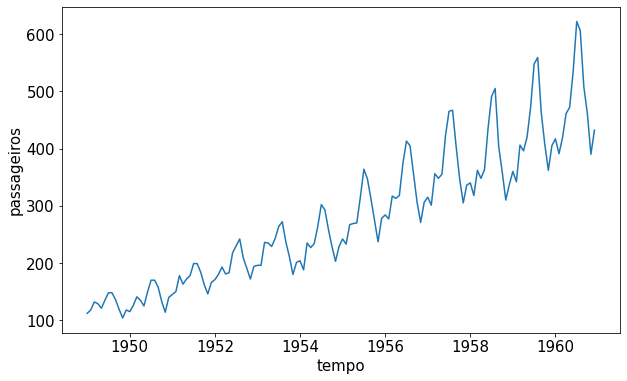

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=dataset)

##Pré-processamento

- Tranformar os dados para a mesma escala
- Dividir os dados em treino e teste

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
sc = StandardScaler()
sc.fit(dataset)
scaled_data = sc.transform(dataset)

In [ ]:
x = scaled_data[:,0]
y = scaled_data[:,1]

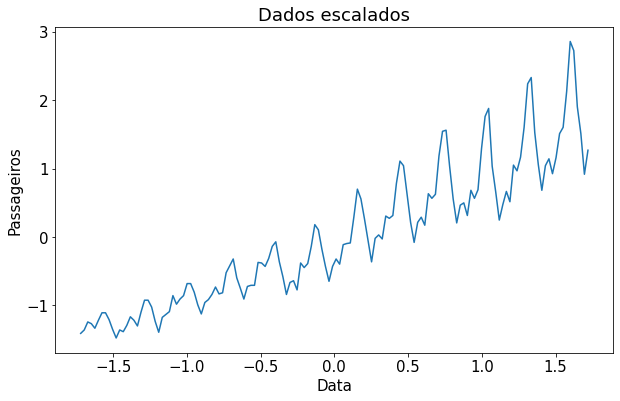

In [ ]:
sns.lineplot(x=x, y=y, data=scaled_data)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.title('Dados escalados')
plt.show()

In [ ]:
test_size = len(x)-int(len(x)*0.1)
X_train = x[:test_size]
y_train = y[:test_size]
X_test = x[test_size:]
y_test = y[test_size:]

#print(len(x_train), len(x_test), len(x))

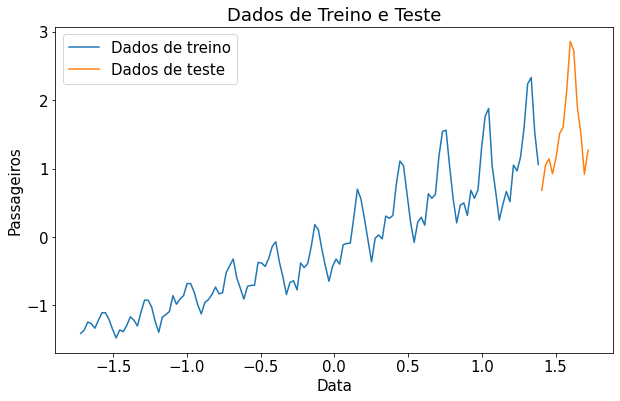

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Dados de treino')
sns.lineplot(x=X_test, y=y_test, label='Dados de teste')
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.title('Dados de Treino e Teste')
plt.show()

## Regressão

Regressão linear com um perceptron.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

# Camda Densa
# units: dimensão da saída, input_dim: dimensão da entrada
# kernel_initializer: pesos iniciais
# use_bias: se usa um bias, se fosse True teria que setar um bias_initializer
# activation: função de ativação

layer = Dense(units = 1, input_dim=1, kernel_initializer='Ones', use_bias=False,
              activation='linear')
regressor.add(layer)

# Compila a rede com a função de  perda e ajuste
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(X_train, y_train)

5/5 [==============================] - 0s 2ms/step - loss: 0.1283


In [ ]:
y_predict = regressor.predict(X_train)

In [ ]:
data = {'tempo': X_train, 'passageiros': y_predict[:,0]}
treino = pd.DataFrame(data)
treino = pd.DataFrame(sc.inverse_transform(treino), columns=['tempo', 'passageiros'])

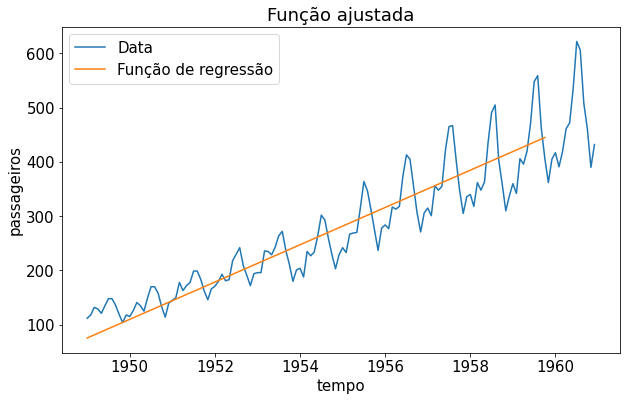

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=dataset, label='Data')
sns.lineplot(x='tempo', y='passageiros', data=treino, label='Função de regressão')
plt.title('Função ajustada')
plt.show()

In [ ]:
y_predict_test = regressor.predict(X_test)
data = {'tempo': X_test, 'passageiros': y_predict_test[:,0]}
teste = pd.DataFrame(data)
teste = pd.DataFrame(sc.inverse_transform(teste), columns=['tempo', 'passageiros'])

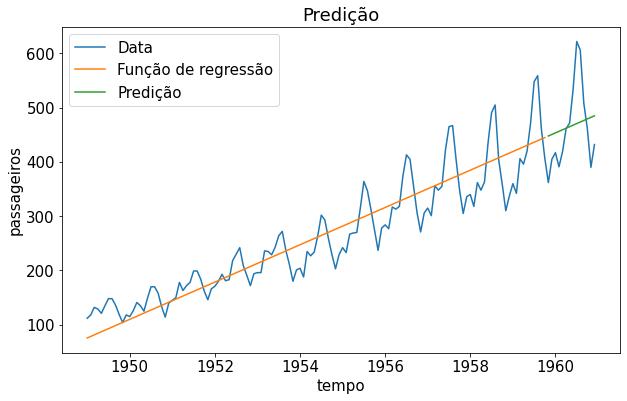

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=dataset, label='Data')
sns.lineplot(x='tempo', y='passageiros', data=treino, label='Função de regressão')
sns.lineplot(x='tempo', y='passageiros', data=teste, label='Predição')
plt.title('Predição')
plt.show()

## Ajuste da rede
Transformando a rede em uma MLP

In [ ]:
mlp = Sequential()
mlp.add(Dense(units= 8, input_dim=1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))
mlp.add(Dense(units= 8, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))
mlp.add(Dense(units= 1, kernel_initializer='random_uniform',
              activation='linear', use_bias=False))
mlp.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8120
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8113
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8105
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8093
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8077
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8053
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8021
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7974
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7914
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7836
Epoch 11/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7738
Epoch 12/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7609
Epoch 13/200
5/5 [==============================] - 0s 1ms/st

In [ ]:
y_predict = mlp.predict(X_train)
y_predict_test = mlp.predict(X_test)

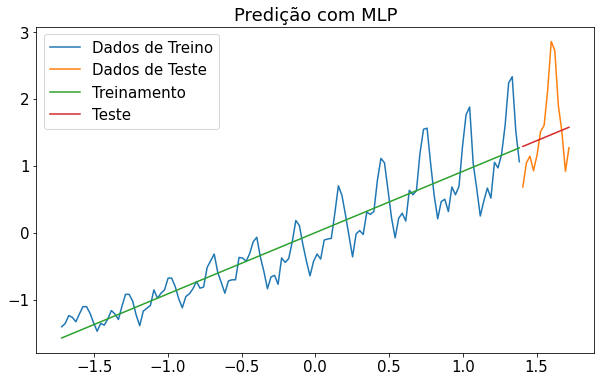

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Dados de Treino')
sns.lineplot(x=X_test, y=y_test, label='Dados de Teste')
sns.lineplot(x=X_train, y=y_predict[:,0], label='Treinamento')
sns.lineplot(x=X_test, y=y_predict_test[:,0], label='Teste')
plt.title('Predição com MLP')
plt.show()

##Mudando a função de ativação
Usando sigmoide nas camadas escondidas e aumentando o número de épocas para 500.

In [ ]:
mlp = Sequential()
mlp.add(Dense(units= 8, input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
mlp.add(Dense(units= 8, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
mlp.add(Dense(units= 1, kernel_initializer='random_uniform',
              activation='linear', use_bias=False))
mlp.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.fit(X_train, y_train, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8073
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8052
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8055
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8059
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8051
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8037
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8016
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8000
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7983
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7966
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7943
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7919
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [ ]:
y_predict = mlp.predict(X_train)
y_predict_test = mlp.predict(X_test)

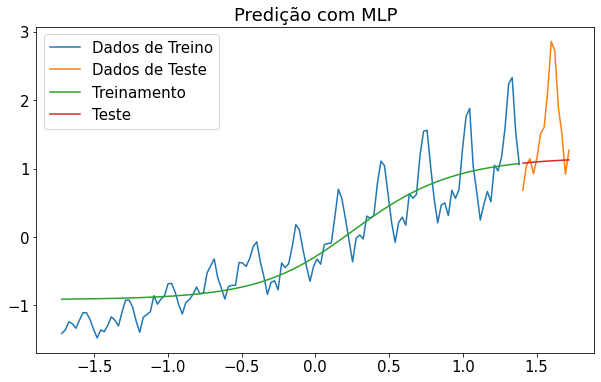

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='Dados de Treino')
sns.lineplot(x=X_test, y=y_test, label='Dados de Teste')
sns.lineplot(x=X_train, y=y_predict[:,0], label='Treinamento')
sns.lineplot(x=X_test, y=y_predict_test[:,0], label='Teste')
plt.title('Predição com MLP')
plt.show()

## Utilizando o dado anterior
- A entrada do modelo passa a ser o número de passageiros na data anterior (ao invés da data, como estávamos fazendo antes).
- O modelo é montado com duas camdas ocultas de 8 e 64 neurônios.


In [ ]:
new_data = pd.DataFrame(scaled_data, columns=['data', 'passageiros'])
new_data['anterior'] = new_data['passageiros'].shift()
new_data.drop(index=0, inplace=True)
new_data

,data,passageiros,anterior
1,-1.696007,-1.357590,-1.407779
2,-1.671950,-1.240483,-1.357590
3,-1.647894,-1.265578,-1.240483
4,-1.623837,-1.332496,-1.265578
5,-1.599780,-1.215389,-1.332496
...,...,...,...
139,1.623837,2.724417,2.858253
140,1.647894,1.904669,2.724417
141,1.671950,1.511525,1.904669
142,1.696007,0.917627,1.511525


In [ ]:
x_ = new_data['anterior'].values
y_ = new_data['passageiros'].values

In [ ]:
test_size_ = len(x_)-int(len(x_)*0.1)
X_train_ = x_[:test_size_]
y_train_ = y_[:test_size_]
X_test_ = x_[test_size_:]
y_test_ = y_[test_size_:]

print(len(X_train_), len(X_test_), len(x_))

129 14 143


In [ ]:
mlp_2 = Sequential()
mlp_2.add(Dense(units=8, input_dim= 1, use_bias=False, kernel_initializer='ones',
                activation='linear'))
mlp_2.add(Dense(units=64, use_bias=False, kernel_initializer='random_uniform',
                activation='sigmoid'))
mlp_2.add(Dense(units=1, use_bias=False, kernel_initializer='random_uniform',
                activation='linear'))

mlp_2.compile(loss='mean_squared_error', optimizer='adam')
mlp_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_2.fit(X_train_, y_train_, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7905
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7586
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7566
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7407
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7226
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7036
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6853
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6664
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6512
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6325
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6146
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5996
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

In [ ]:
y_predict_ = mlp_2.predict(X_train_)
y_predict_test_ = mlp_2.predict(X_test_)

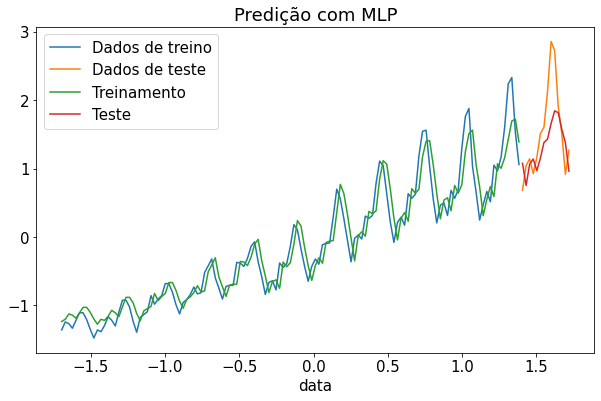

In [ ]:
fig=plt.figure()
sns.lineplot(x='data', y=y_train_,data=new_data[:129], label='Dados de treino')
sns.lineplot(x='data', y=y_test_,data=new_data[129:], label='Dados de teste')
sns.lineplot(x='data', y=y_predict_[:,0], data=new_data[:129], label='Treinamento')
sns.lineplot(x='data', y=y_predict_test_[:,0], data=new_data[129:], label='Teste')
plt.title('Predição com MLP')
plt.show()

##Aumentando a janela de dados 
- Passando como entrada os últimos 4 valores da coluna passageiro. 
- 500 épocas de treinamento

In [ ]:
def get_last_n_passagers(x, n):
  return new_data.loc[x.name-n:x.name-1, 'passageiros'].values

new_data = pd.DataFrame(scaled_data, columns=['data', 'passageiros'])
new_data['anterior'] = new_data.apply(lambda x: get_last_n_passagers(x, 4), axis=1)
new_data.drop(index=new_data.index[0:4], inplace=True)
new_data.reset_index(inplace=True)
new_data

,index,data,passageiros,anterior
0,4,-1.623837,-1.332496,"[-1.4077788408280638, -1.3575902326797062, -1...."
1,5,-1.599780,-1.215389,"[-1.3575902326797062, -1.2404834803335385, -1...."
2,6,-1.575723,-1.106647,"[-1.2404834803335385, -1.2655777844077172, -1...."
3,7,-1.551666,-1.106647,"[-1.2655777844077172, -1.3324959286055273, -1...."
4,8,-1.527609,-1.207024,"[-1.3324959286055273, -1.2153891762593596, -1...."
...,...,...,...,...
135,139,1.623837,2.724417,"[1.5115251998014054, 1.6035376480733945, 2.130..."
136,140,1.647894,1.904669,"[1.6035376480733945, 2.1305180336311498, 2.858..."
137,141,1.671950,1.511525,"[2.1305180336311498, 2.8582528517823356, 2.724..."
138,142,1.696007,0.917627,"[2.8582528517823356, 2.7244165633867152, 1.904..."


In [ ]:
x_ = np.stack( new_data['anterior'].values, axis=0 )
y_ = new_data['passageiros'].values

In [ ]:
test_size_ = len(x_)-int(len(x_)*0.1)
X_train_ = x_[:test_size_]
y_train_ = y_[:test_size_]
X_test_ = x_[test_size_:]
y_test_ = y_[test_size_:]

print(len(X_train_), len(X_test_), len(x_))

126 14 140


In [ ]:
mlp_2 = Sequential()
mlp_2.add(Dense(units=8, input_dim= 4, use_bias=False, kernel_initializer='ones',
                activation='linear'))
mlp_2.add(Dense(units=64, use_bias=False, kernel_initializer='random_uniform',
                activation='sigmoid'))
mlp_2.add(Dense(units=1, use_bias=False, kernel_initializer='random_uniform',
                activation='linear'))

mlp_2.compile(loss='mean_squared_error', optimizer='adam')
mlp_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_11 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_2.fit(X_train_, y_train_, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7596
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6879
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6208
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5569
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4942
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4289
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3674
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3083
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2616
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 13/500
4/4 [==============================] - 0s 1ms/st

In [ ]:
y_predict_ = mlp_2.predict(X_train_.astype('float32'))
y_predict_test_ = mlp_2.predict(X_test_)

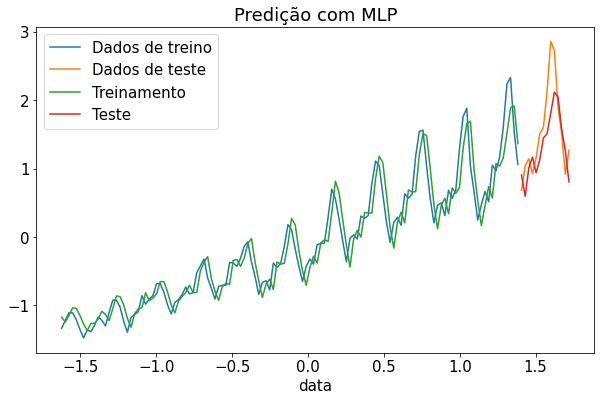

In [ ]:
fig=plt.figure()
sns.lineplot(x='data', y=y_train_,data=new_data[:126], label='Dados de treino')
sns.lineplot(x='data', y=y_test_,data=new_data[126:], label='Dados de teste')
sns.lineplot(x='data', y=y_predict_[:,0], data=new_data[:126], label='Treinamento')
sns.lineplot(x='data', y=y_predict_test_[:,0], data=new_data[126:], label='Teste')
plt.title('Predição com MLP')
plt.show()

#Base de dados bicileta

*datas (datetime)*: data do aluguel da bicicleta 

*contagem* (int): número de bikes alugadas

*temperatura*, *sensacao*, *umidade*, *vel_vento* (float): condições climáticas do dia do aluguel

*feriado*, *final_ds* (float - boolean)

*estação* (float - categórico ordinal)

In [ ]:
url='https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
s = requests.get(url).content
bike = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike.info(verbose=True)
bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datas        17414 non-null  object 
 1   contagem     17414 non-null  int64  
 2   temperatura  17414 non-null  float64
 3   sensacao     17414 non-null  float64
 4   umidade      17414 non-null  float64
 5   vel_vento    17414 non-null  float64
 6   clima        17414 non-null  float64
 7   feriado      17414 non-null  float64
 8   final_ds     17414 non-null  float64
 9   estacao      17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


9075     2016-01-19 00:00:00
9713     2016-02-14 21:00:00
17137    2016-12-23 11:00:00
13799    2016-08-04 14:00:00
13108    2016-07-06 16:00:00
Name: datas, dtype: object

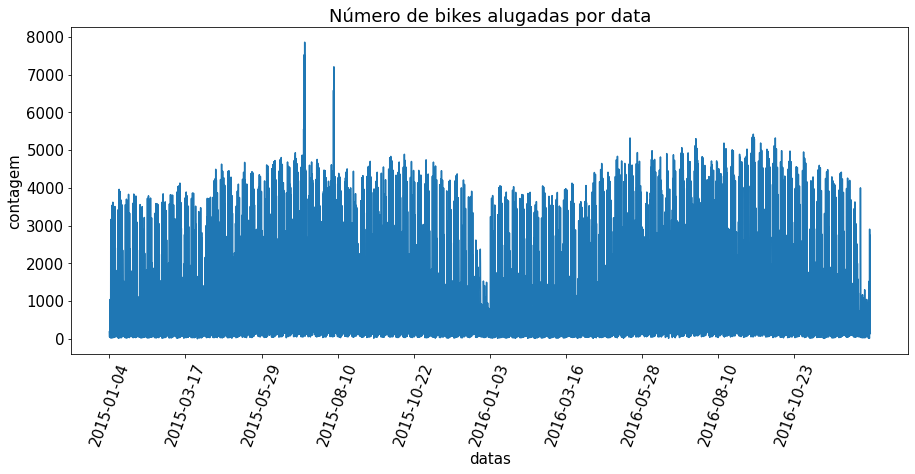

In [ ]:
x_ticks = [bike.index[int(bike.shape[0]*x)] for x in list(np.linspace(0,0.9,10)) ]
labels = bike.loc[x_ticks, 'datas']
x_ticks_labels = [x.split(' ')[0] for x in labels.values]

plt.figure(figsize=(15,6))
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(x_ticks, x_ticks_labels, rotation=70)
plt.title('Número de bikes alugadas por data')
plt.locator_params(axis='x', nbins=10)
plt.show()

## Pré-processamento 
- Escalonamento dos dados
- y: contagem 
- x: 10 últimas contagens 
- divisão de treino e teste

In [ ]:
sc = StandardScaler()
sc.fit(bike['contagem'].values.reshape(-1,1))
scaled_count = sc.transform(bike['contagem'].values.reshape(-1,1))
scaled_count[:,0]

array([-0.88574518, -0.9262953 , -0.92998167, ..., -0.74289816,
       -0.84703824, -0.92537371])

In [ ]:
def get_last_n_contagens(x, n):
  return data_bike.loc[x.name-n:x.name-1, 'contagem'].values


In [ ]:
data = {'data': bike['datas'].values, 'contagem': scaled_count[:,0]}
data_bike = pd.DataFrame(data)
data_bike['anteriores']=data_bike.apply(lambda x: get_last_n_contagens(x,10), axis=1)
data_bike.drop(data_bike.index[:10], inplace=True)
data_bike.reset_index(inplace=True, drop=True)

In [ ]:
x = np.stack(data_bike['anteriores'].values, axis=0)
y = data_bike['contagem'].values

In [ ]:
test_size = len(x)-int(len(x)*0.1)
X_train = x[:test_size]
y_train = y[:test_size]
X_test = x[test_size:]
y_test = y[test_size:]

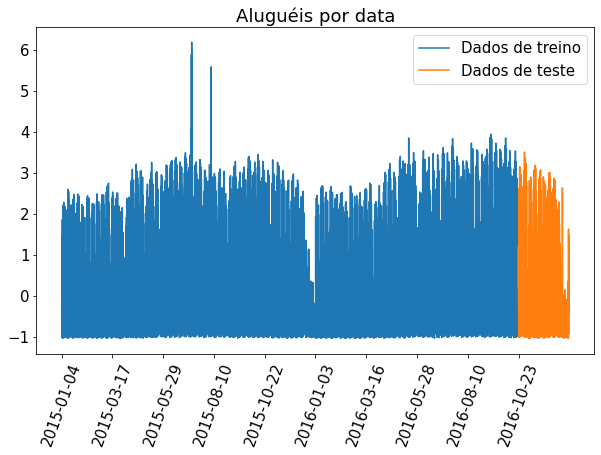

In [ ]:
sns.lineplot(x=data_bike.loc[:test_size-1,'data'].values, y=y_train,
             label='Dados de treino')
sns.lineplot(x=data_bike.loc[test_size:,'data'].values, y=y_test,
             label='Dados de teste')
plt.xticks(x_ticks, x_ticks_labels, rotation=70)
plt.title('Aluguéis por data')
plt.show()

A rede recorrente recebe uma matriz tri-dimensional com uma dimensão sendo o número de passos por tempo. 

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(15664, 10, 1)
(1740, 10, 1)


In [ ]:
recorrente = Sequential()
recorrente.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error', optimizer ='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ajuste = recorrente.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        epochs=100)

Epoch 1/100
490/490 [==============================] - 5s 11ms/step - loss: 0.2558 - val_loss: 0.0762
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0731 - val_loss: 0.0340
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0538 - val_loss: 0.0311
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0458 - val_loss: 0.0266
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0421 - val_loss: 0.0345
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0394 - val_loss: 0.0223
Epoch 7/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0372 - val_loss: 0.0324
Epoch 8/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0360 - val_loss: 0.0207
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0346 - val_loss: 0.0217
Epoch 10/100
490/490 [==============================] - 5s 10ms/step - loss: 0.033

In [ ]:
y_predict = recorrente.predict(X_train)
y_predict

array([[-0.57697624],
       [-0.43510765],
       [-0.18883726],
       ...,
       [-0.9047279 ],
       [-0.78408337],
       [-0.52288353]], dtype=float32)

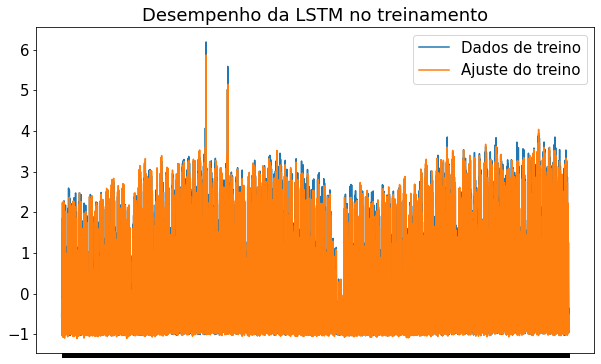

In [ ]:
sns.lineplot(x=data_bike.loc[:test_size-1,'data'].values, y=y_train,
             label='Dados de treino')
sns.lineplot(x=data_bike.loc[:test_size-1,'data'].values, y=y_predict[:,0],
             label='Ajuste do treino')
plt.tick_params( axis='x',labelbottom=False)
plt.title('Desempenho da LSTM no treinamento')
plt.show()

In [ ]:
y_predict_test = recorrente.predict(X_test)

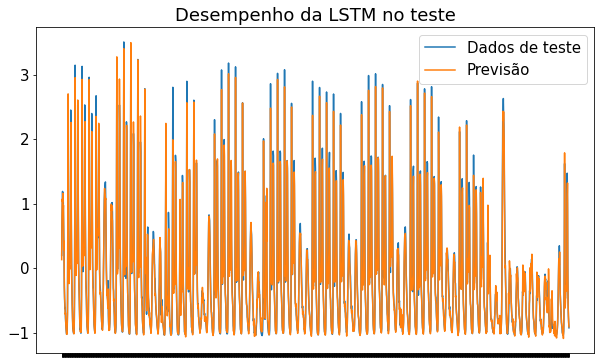

In [ ]:
sns.lineplot(x=data_bike.loc[test_size:,'data'].values, y=y_test,
             label='Dados de teste')
sns.lineplot(x=data_bike.loc[test_size:,'data'].values, y=y_predict_test[:,0],
             label='Previsão')
plt.tick_params( axis='x',labelbottom=False)
plt.title('Desempenho da LSTM no teste')
plt.show()

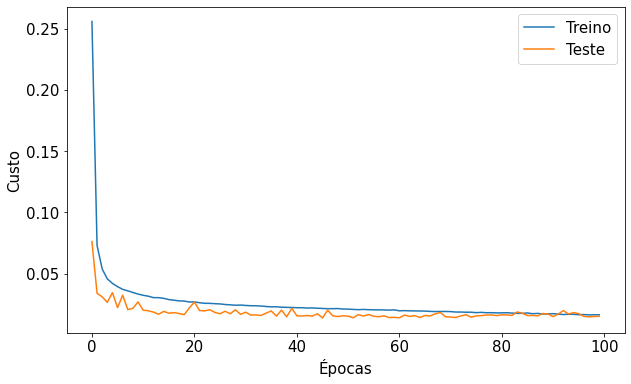

In [ ]:
plt.plot(ajuste.history['loss'])
plt.plot(ajuste.history['val_loss'])
plt.legend(['Treino', 'Teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()